In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(100, 100, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (9, 9), activation='relu', padding='same')(input_img)
x = MaxPooling2D((16, 16), padding='same')(x)
x = Conv2D(16, (9, 9), activation='relu', padding='same')(x)
x = MaxPooling2D((8, 8), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((4, 4), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
import pandas as pd
import numpy as np
import skimage
from sklearn.model_selection import train_test_split

img_folder = r'C:\Users\Kamil Ogrodowski\Desktop\Obrazowanie\218447-medical_imaging-788b05f861ac\dataset'
img_width = 100
img_height = 100

# Read data
data = pd.read_csv(r'C:\Users\Kamil Ogrodowski\Desktop\Obrazowanie\218447-medical_imaging-788b05f861ac\dataset\GTruth.csv')

# Split to train_data, val_data, test_data
train_data, test_data = train_test_split(data)

def read_img(fileid):
    """
    Read and resize img, adjust channels. 
    Caution: This function is not independent, it uses global vars: img_folder, img_channels
    @param file: file id, int
    """
    img = skimage.io.imread(img_folder +'\\' +str(fileid) + '.jpeg')
    img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
    # A few image are grey, duplicate them for to have 3 alpha channels.
    if(len(img.shape) < 3):
        img = np.dstack([img, img, img])
    return img
                        
# Train data
train_X = np.stack(train_data['Id'].apply(read_img))
test_X = np.stack(test_data['Id'].apply(read_img))

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print x_train.shape
# print x_test.shape

In [8]:
from keras.callbacks import TensorBoard

#checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=true, mode='auto')  

autoencoder.fit(train_X, train_X,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X, test_X))

Train on 4392 samples, validate on 1464 samples
Epoch 1/20
4392/4392 [==============================] - 131s 30ms/step - loss: 0.6923 - val_loss: 0.6902
Epoch 2/20
4392/4392 [==============================] - 127s 29ms/step - loss: 0.6810 - val_loss: 0.6955
Epoch 3/20
4392/4392 [==============================] - 127s 29ms/step - loss: 0.6517 - val_loss: 0.6433
Epoch 4/20
4392/4392 [==============================] - 128s 29ms/step - loss: 0.6282 - val_loss: 0.6151
Epoch 5/20
4392/4392 [==============================] - 127s 29ms/step - loss: 0.6185 - val_loss: 0.6178
Epoch 6/20
4392/4392 [==============================] - 131s 30ms/step - loss: 0.6143 - val_loss: 0.6195
Epoch 7/20
4392/4392 [==============================] - 127s 29ms/step - loss: 0.6104 - val_loss: 0.6135
Epoch 8/20
4392/4392 [==============================] - 127s 29ms/step - loss: 0.6080 - val_loss: 0.6143
Epoch 9/20
4392/4392 [==============================] - 129s 29ms/step - loss: 0.6062 - val_loss: 0.6036
Epoch 1

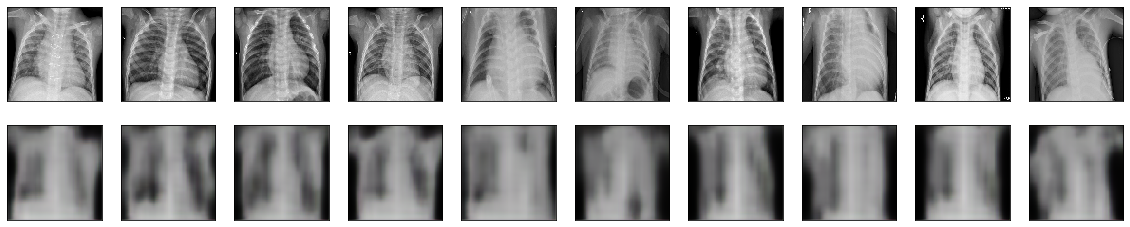

In [11]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(test_X)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i].reshape(100, 100, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(100, 100, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras.models import load_model
autoencoder.save('deepAutoencoderV2.h5')  # creates a HDF5 file 'my_model.h5'
